### Pertemuan 17. Statistika Regresi

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

X1 = iris.data[0:50, 0:2] # Sentosa
X2 = iris.data[50:100, 0:2] # VersiColor
X3 = iris.data[100:150, 0:2] # Virginica

In [3]:
m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)
m3 = np.mean(X3, axis=0)

In [4]:
C1 = np.cov(X1.T)
C2 = np.cov(X2.T)
C3 = np.cov(X3.T)

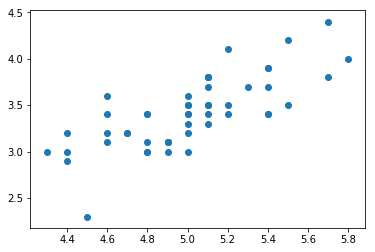

In [7]:
# Semua data dari Kolom Pertama
plt.scatter(X1[:, 0], X1[:, 1])
# Panjang Petal X
# Lebar Petal Y
plt.show()



In [8]:
# Bisa memprediksi Variable yang satu dengan yang Lain, Ingin Prediksi Lebar Petal
# Kita akan mencari Fungsi Y apanya X, atau Y berapa kali X
# Bisa meng-asumsikan macam-macam : Fungsi Kuadrat, Fungsi Linear
# Fungsi Kuadrad :  ax2+ bx + c
# Kita pake Awal Regresi menggunakan Linear : Mx + C
# Bisa juga Logaritma Log X / C



In [18]:
# Tampilkan data yang pertama
X1[0:8, :]

# Kita ingin mencari Data yang pertama 
# Contoh : 
# 5.1*M + C = 3.5 => kita harus mencari M dan C
# 4.9*M + C = 3
# Dst
# tetapi di regresi, dalam kasus ini punya 50 Persamaan, untuk mencari 2 itu 

# Biasanya untuk menyederhanakan kita tulis dalam bentuk Matrix
# [5,1 1   [M
#  4,9  1] C ]= [3.5]
#    X      b = y
# Matrisknya di Invers
# b = X'.y
# Menjadi Seudo Invers
# b = ( Xtranspose X)' Xtranspose*y  




In [19]:
cOnes = X1[:, 0]
mOnes  = np.ones(50)
# Untuk X
X = np.c_[cOnes, mOnes] # Digabung
X.shape # ukuran


(50, 2)

In [20]:
# Untuk Y
y = X1[:, 1]
y.shape

(50,)

In [24]:
# matmul, matrix multipication atau perkalian
r1 = np.matmul(X.T, y) # Xtranpose dikali Y
r2 = np.matmul(X.T, X) # XTranspose X
r1.shape


(2,)

In [23]:
r2.shape

(2, 2)

In [25]:
# Menghitung Invers dari r2
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.80723367, -0.62301173])

In [27]:
XX = np.arange(0, 10, 0.05)
XX.shape

(200,)

In [28]:
YY = b[0]*XX + b[1]

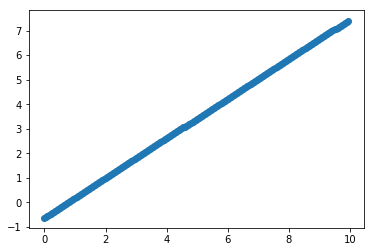

In [29]:
plt.scatter(XX, YY)

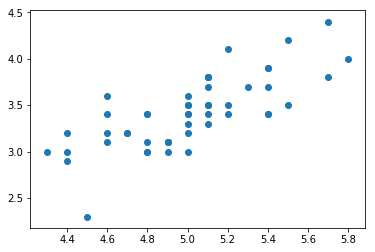

In [30]:
plt.scatter(X1[:, 0], X1[:, 1])

<function matplotlib.pyplot.show(*args, **kw)>

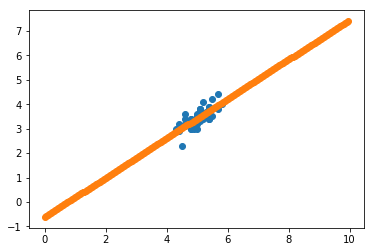

In [32]:
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(XX, YY)
plt.show

# Menggunakan Fungsi Persamaan Kuadrad

In [36]:
c1 = X1[:, 0]
sqc1 = np.square(c1)
mones = np.ones(50)
X = np.c_[sqc1, c1, mones]
X.shape

(50, 3)

In [37]:
y = X1[:, 1]
y.shape

(50,)

In [38]:
r1 = np.matmul(X.T, y) # Xtranpose dikali Y
r2 = np.matmul(X.T, X) # XTranspose X
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.16582985, -0.85979347,  3.54623206])

In [39]:
# Sehingga persamaannya y = 0.16582985x2+-0.85979347+3.54623206]

In [41]:
XX = np.arange(0, 10, 0.05)
YY = b[0]*XX*XX + b[1]*XX + b[2]

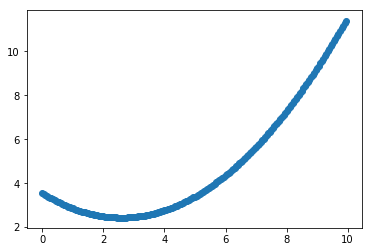

In [42]:
plt.scatter(XX, YY)

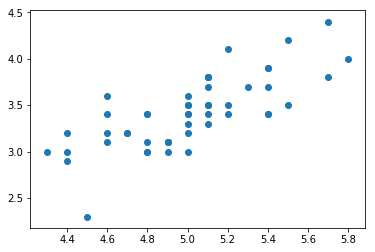

In [43]:
plt.scatter(X1[:, 0], X1[:, 1])

<function matplotlib.pyplot.show(*args, **kw)>

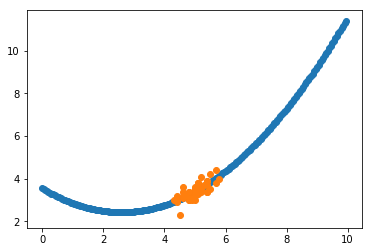

In [44]:
plt.scatter(XX, YY)
plt.scatter(X1[:, 0], X1[:, 1])
plt.show

In [45]:
cbc1 = c1*c1*c1
X = np.c_[cbc1, sqc1, c1, mones]
r1 = np.matmul(X.T, y) # Xtranpose dikali Y
r2 = np.matmul(X.T, X) # XTranspose X
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ -0.40357418,   6.2704119 , -31.5094635 ,  54.62270796])

<function matplotlib.pyplot.show(*args, **kw)>

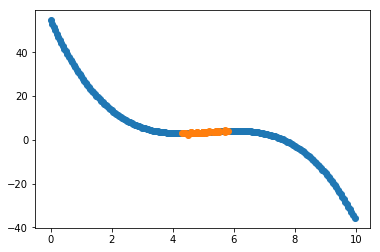

In [46]:
XX = np.arange(0, 10, 0.05)
YY = b[0]*XX*XX*XX + b[1]*XX*XX + b[2]*XX+b[3]
plt.scatter(XX, YY)
plt.scatter(X1[:, 0], X1[:, 1])
plt.show

In [ ]:
#prediksi Atribut ke 2, yang kita pake 1 dan 3

In [47]:
X1 = iris.data[0:50, 0:3]
X1[0:8, :]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5]])

In [48]:
X1 = iris.data[0:50, [0, 2, 1]]
X1[0:8, :]

array([[5.1, 1.4, 3.5],
       [4.9, 1.4, 3. ],
       [4.7, 1.3, 3.2],
       [4.6, 1.5, 3.1],
       [5. , 1.4, 3.6],
       [5.4, 1.7, 3.9],
       [4.6, 1.4, 3.4],
       [5. , 1.5, 3.4]])

In [50]:
# Linearnya adalah sama
# 5,1.C1 + 1,4.C2 + C3 = 3.5
# 4,9.C1 + 1.4.C2 + C3 = 3
#dst

colom1 = X1[:, 0]
colom2 = X1[:, 1]
mones = np.ones(50)
X = np.c_[colom1, colom2, mones]
y = X1[:, 2]

In [51]:
r1 = np.matmul(X.T, y) # Xtranpose dikali Y
r2 = np.matmul(X.T, X) # XTranspose X
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.8134761 , -0.04805918, -0.58390272])

In [52]:
XX = np.arange(0, 10, 0.05)
XX1 = np.arange(0, 10, 0.05)
XX2 = np.arange(0, 10, 0.05)
GX1, GX2 = np.meshgrid(XX1, XX2)
GX1.shape

(200, 200)

In [53]:
YY = b[0]*GX1.ravel() + b[1]*GX2.ravel() + b[2] # ravel. vektor
YY.shape

(40000,)

<function matplotlib.pyplot.show(*args, **kw)>

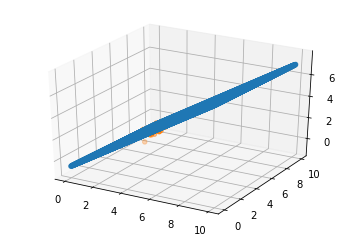

In [54]:
#harus pakai scatter 3 D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(GX1.ravel(), GX2.ravel(), YY)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
plt.show

In [55]:
#aX

c1 = X1[:, 0]
c2 = X1[:, 1]
sqc1 = c1*c1
sqc2 = c2*c2
c1c2 = c1*c2
X = np.c_[sqc1, sqc2, c1c2, c1, c2, mones]
y = X1[:, 2]
r1 = np.matmul(X.T, y) # Xtranpose dikali Y
r2 = np.matmul(X.T, X) # XTranspose X
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.05212075,  1.21429185,  0.1569168 ,  0.09291483, -4.39289485,
        4.28066767])

In [56]:
YY= b[0]*GX1.ravel()*GX1.ravel() + b[1]*GX2.ravel()*GX2.ravel() + b[2]*GX1.ravel()*GX2.ravel() + b[3]*GX1.ravel() + b[4]*GX2.ravel() + b[5]
YY.shape

(40000,)

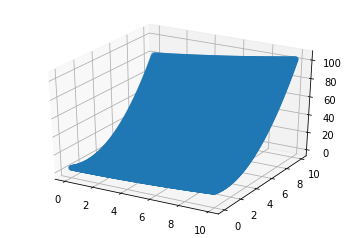

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(GX1.ravel(), GX2.ravel(), YY)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
plt.show()

In [58]:
X1[0:8, :]

array([[5.1, 1.4, 3.5],
       [4.9, 1.4, 3. ],
       [4.7, 1.3, 3.2],
       [4.6, 1.5, 3.1],
       [5. , 1.4, 3.6],
       [5.4, 1.7, 3.9],
       [4.6, 1.4, 3.4],
       [5. , 1.5, 3.4]])

In [59]:
c1 = X1[:, 0]
c2 = X1[:, 1]
X = np.c_[c1, c2]
X.shape

(50, 2)

In [60]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

linreg = linear_model.LinearRegression()
y = X1[:, 2]
linreg.fit(X, y)
linreg.coef_

array([ 0.8134761 , -0.04805918])

In [61]:
X = np.c_[c1, c2, mones]
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
linreg.coef_

array([ 0.8134761 , -0.04805918,  0.        ])

In [63]:
linreg.fit(X, y, normalize=True)

TypeError: fit() got an unexpected keyword argument 'normalize'

In [64]:
from sklearn.linear_model import Ridge
ridreg = Ridge(alpha = 1.0)
ridreg.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
ridreg.coef_

array([0.69222313, 0.01009613, 0.        ])

In [66]:
ridreg = Ridge(alpha = 3.0)
ridreg.fit(X, y)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
ridreg = Ridge(alpha = 4.0)
ridreg.fit(X, y)

Ridge(alpha=4.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
ridreg = Ridge(alpha = 0.0)
ridreg.fit(X, y)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
iris.data[45:55, :]

array([[4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [70]:
iris.target[44:55]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [72]:
from sklearn.linear_model import LogisticRegression

X1 = iris.data[0:100, 0:2]
mean1 = np.mean(X1, axis = 0)
mean1

array([5.471, 3.094])

In [74]:
c1 = X1[:, 0] - m1[0]
c2 = X1[:, 1] - m1[1]
y = iris.target[0:100]
X = np.c_[c1, c2]
logreg = LogisticRegression(C=1e5, solver='lbfgs')
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [75]:
logreg.predict([[5.0, 0.2]])

array([1])

In [76]:
logreg.predict([[3.0, 7.0]])

array([0])

In [77]:
XX = np.arange(0, 10, 0.05)
YY = np.arange(0, 10, 0.05)
GX, GY = np.meshgrid(XX, YY)
input = np.c_[GX.ravel(), GY.ravel()]
output = logreg.predict(input)
output.shape

(40000,)

In [78]:
output[0:8]

array([0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
output[-8:]

array([1, 1, 1, 1, 1, 1, 1, 1])

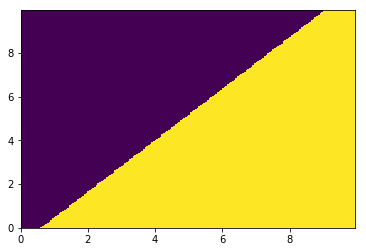

In [80]:
plt.pcolormesh(GX, GY, output.reshape(GX.shape))